# Evaluate Exercises

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols

from pydataset import data

import evaluate

## 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.drop(columns={'sex', 'smoker', 'day', 'time', 'size'}, inplace=True)

In [4]:
df['baseline'] = df['tip'].mean()
df.head(3)

,total_bill,tip,baseline
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279
3,21.01,3.50,2.998279


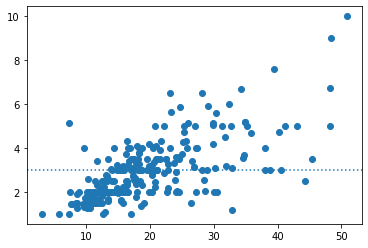

In [5]:
# plot data with baseline:
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')

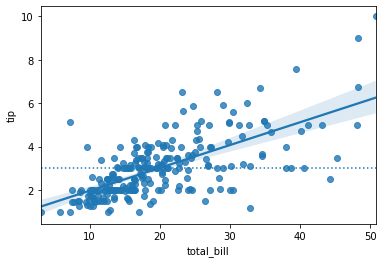

In [6]:
#Visualize the line of best fit against the baseline
ax = sns.regplot(x="total_bill", y="tip", data=df)
plt.axhline(df.tip.mean(), ls = ':')

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [7]:
model = ols('tip ~ total_bill', data=df).fit()
df['yhat'] = model.predict(df.total_bill)
df.head()

,total_bill,tip,baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822


## 3. Plot the residuals for the linear regression model that you made.

In [8]:
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline

In [10]:
df.head()

,total_bill,tip,baseline,yhat,residual,baseline_residual
1,16.99,1.01,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,2.998279,3.502822,0.107178,0.611721


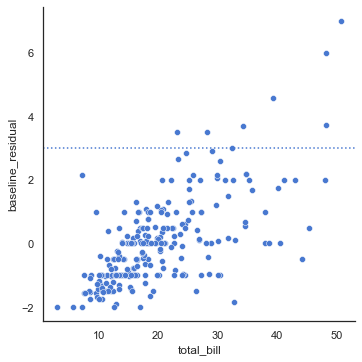

In [41]:
ax = sns.relplot(x="total_bill", y="baseline_residual", data=df)
plt.axhline(df.tip.mean(), ls =':')

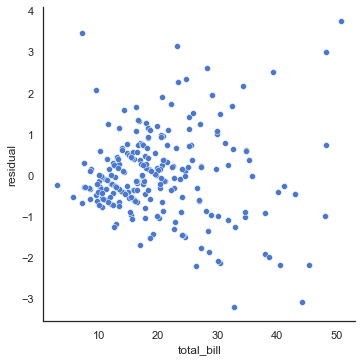

In [40]:
ax = sns.relplot(x='total_bill', y='residual', data=df)

## 4. Calculate...

###  ..the sum of squared errors...

In [13]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df

,total_bill,tip,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203
...,...,...,...,...,...,...,...,...
240,29.03,5.92,2.998279,3.969131,1.950869,2.921721,3.805888,8.536455
241,27.18,2.00,2.998279,3.774836,-1.774836,-0.998279,3.150043,0.996560
242,22.67,2.00,2.998279,3.301175,-1.301175,-0.998279,1.693057,0.996560
243,17.82,1.75,2.998279,2.791807,-1.041807,-1.248279,1.085361,1.558200


In [43]:
SSE = df['residual^2'].sum()

print("SSE = ", SSE)

SSE =  252.788743850776


### ...mean Squared Error...

In [15]:
MSE = SSE/len(df)

print("MSE = ", MSE)

MSE =  1.036019442011377


### ...root mean squared error...

In [16]:
from math import sqrt
RMSE = sqrt(MSE)
print("RMSE = ", RMSE)

RMSE =  1.0178504025697377


### ...total sum of squares...

In [17]:
# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =  df['baseline_residual^2'].sum() 
TSS

465.2124770491804

### ...explained sum of squares...

In [18]:
# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE
ESS

212.4237331984044

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [19]:
SSE = df['baseline_residual^2'].sum()

print("SSE = ", SSE)

SSE =  465.2124770491804


In [20]:
MSE = SSE/len(df)

print("MSE = ", MSE)

MSE =  1.906608512496641


In [21]:
RMSE = sqrt(MSE)
print("RMSE = ", RMSE)

RMSE =  1.3807999538298954


In [22]:
TSS = SSE_baseline =  df['baseline_residual^2'].sum() 
TSS

465.2124770491804

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [60]:
def model_SSE_stats(df):
    baseline_SSE = df['baseline_residual^2'].sum()
    model_SSE = df['residual^2'].sum()
    print(f'The baseline sum of squared errors is: {baseline_SSE}')
    print(f'The model sum of squared errors is: {model_SSE}')
    print('----------')
    if baseline_SSE > model_SSE:
        print('The model performs better than the baseline model.')
    else:
        print('The model does not perform better than the baseline model. Do not proceed with current model.')

In [61]:
model_SSE_stats(df)

The baseline sum of squared errors is: 465.2124770491804
The model sum of squared errors is: 252.788743850776
----------
The model performs better than the baseline model.


## 7. What is the amount of variance explained in your model?

In [25]:
#Re-calculate the SSE for the Model
SSE = df['residual^2'].sum()

#Re-calculate the ESS for the Model
ESS = TSS - SSE

#Calculate R2 for the model
R2 = ESS/TSS
print(f'{R2:.2%} of the variance/error can be explained by the model.')

45.66% of the variance/error can be explained by the model.


## 8. Is your model significantly better than the baseline model?

In [26]:
null_hypothesis = 'The model is not significantly better than the baseline model'
alt_hypothesis = 'The model is significantly better than the baseline model'

confidence_int = .95
a = 1 - confidence_int

In [27]:
f_pval = model.f_pvalue

print("p-value for model significance = ", round(f_pval,4))

p-value for model significance =  0.0


In [28]:
if f_pval < a:
    print(f'Reject the null hypothesis.')
    print(f'Move forward with the udnerstaidning that {alt_hypothesis}')
else: 
    print("Fail to reject the null hypothesis.")
    print(f"Proceed with the understanding that {null_hypothesis}")

Reject the null hypothesis.
Move forward with the udnerstaidning that The model is significantly better than the baseline model


## 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)

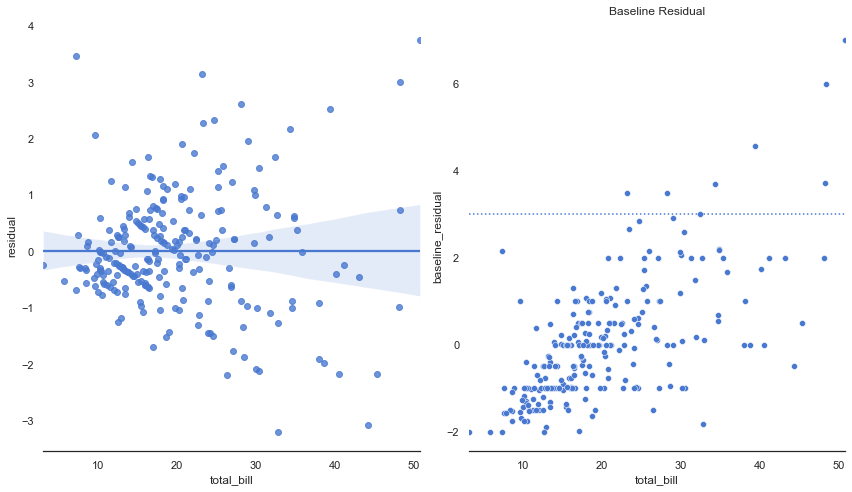

In [29]:
#Use evaluate moldule to visualize the residuals
evaluate.plot_residuals(df, df.tip, df.total_bill)

In [30]:
#Report regression errors evaluation metrics
evaluate.regression_errors(df)

SSE =  252.788743850776
MSE =  1.036019442011377
RMSE =  1.0178504025697377
TSS =  465.2124770491804
ESS = 212.4237331984044


## 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [31]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [32]:
#Prepare the data
mpg.drop(columns={'manufacturer', 'model', 'year', 'cyl', 'trans', 'drv', 'cty', 'fl', 'class'}, inplace=True)
mpg.head()

,displ,hwy
1,1.8,29
2,1.8,29
3,2.0,31
4,2.0,30
5,2.8,26


In [33]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   displ   234 non-null    float64
 1   hwy     234 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 5.5 KB


In [34]:
#calculate baseline:
mpg['baseline'] = mpg.hwy.mean()
mpg.head()


,displ,hwy,baseline
1,1.8,29,23.440171
2,1.8,29,23.440171
3,2.0,31,23.440171
4,2.0,30,23.440171
5,2.8,26,23.440171


In [35]:
#Fit the linear regression model

#Create the object and fit the data to the model
model = ols('hwy ~ displ', data=mpg).fit()

#make predictions
mpg['yhat'] = model.predict(mpg.displ)

#preview the dataframe with predictions
mpg.head()

,displ,hwy,baseline,yhat
1,1.8,29,23.440171,29.342591
2,1.8,29,23.440171,29.342591
3,2.0,31,23.440171,28.636473
4,2.0,30,23.440171,28.636473
5,2.8,26,23.440171,25.812002


In [36]:
#Calculate the residuals
mpg['residual'] = mpg.hwy - mpg.yhat
mpg['baseline_residual'] = mpg.hwy - mpg.baseline

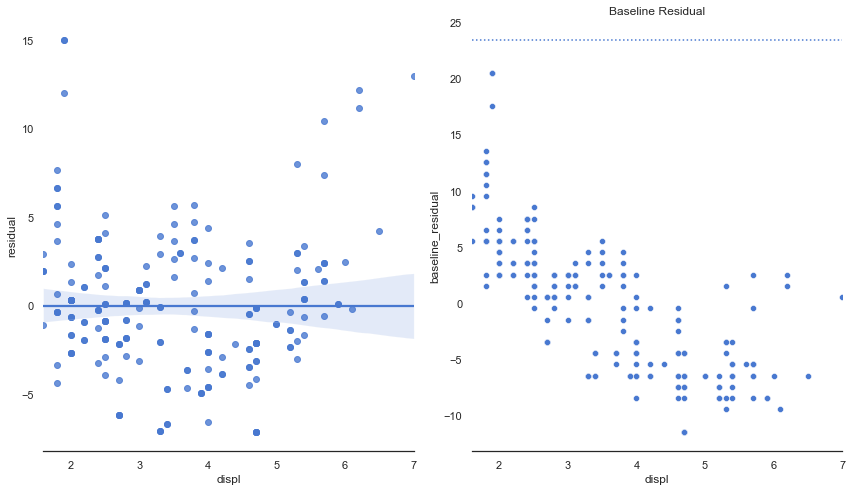

In [37]:
evaluate.plot_residuals(mpg, mpg.hwy, mpg.displ)

In [38]:
#Use Evaluate.py Module to run evaluation metrics on the model
evaluate.regression_errors(mpg)

SSE =  3413.829008995466
MSE =  14.589012858954984
RMSE =  3.819556631201452
TSS =  8261.66239316239
ESS = 4847.833384166925


In [39]:
#Review the model summary stats
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.04e-46
Time:                        16:24:42   Log-Likelihood:                -645.62
No. Observations:                 234   AIC:                             1295.
Df Residuals:                     232   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6977      0.720     49.555      0.000      34.278      37.117
displ         -3.5306      0.195    -18.151      0.000      -3.914      -3.147
==============================================================================
Omnibus:                       45.280   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.192
Skew:                           0.961   Prob(JB):                     2.60e-20
Kurtosis:                       5.357   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_SSE_stats(mpg)

The baseline sum of squared errors is: 8261.66239316239
The model sum of squared errors is: 3413.829008995466
----------
The model performs better than the baseline model.


### Takeaway:
> The model performs better than the baseline model and the model explains 58% of the variance.
The p_value is less than the alpha with a confidence interval of .95, allowing me to reject the null hypothesis.